In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
sns.set(color_codes=True)
%matplotlib inline

C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1.1) Read the dataset. Do the descriptive statistics and do null value condition check.	

In [2]:
data=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [5]:
data.rename(columns={'economic.cond.national':'Economic_Condn_National','economic.cond.household':'Economic_Condn_Household','political.knowledge':'Political_Knowledge','age':'Age','gender':'Gender','vote':'Vote'},inplace=True)

In [6]:
data.Political_Knowledge=data.Political_Knowledge.astype('object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Vote                      1525 non-null   object
 1   Age                       1525 non-null   int64 
 2   Economic_Condn_National   1525 non-null   int64 
 3   Economic_Condn_Household  1525 non-null   int64 
 4   Blair                     1525 non-null   int64 
 5   Hague                     1525 non-null   int64 
 6   Europe                    1525 non-null   int64 
 7   Political_Knowledge       1525 non-null   object
 8   Gender                    1525 non-null   object
dtypes: int64(6), object(3)
memory usage: 107.4+ KB


In [8]:
data.describe().round(2)

,Age,Economic_Condn_National,Economic_Condn_Household,Blair,Hague,Europe
count,1525.00,1525.00,1525.00,1525.00,1525.00,1525.00
mean,54.18,3.25,3.14,3.33,2.75,6.73
std,15.71,0.88,0.93,1.17,1.23,3.30
min,24.00,1.00,1.00,1.00,1.00,1.00
25%,41.00,3.00,3.00,2.00,2.00,4.00
50%,53.00,3.00,3.00,4.00,2.00,6.00
75%,67.00,4.00,4.00,4.00,4.00,10.00
max,93.00,5.00,5.00,5.00,5.00,11.00


In [9]:
#vote is the dependant variable

In [10]:
data.Vote.value_counts()

Labour          1063
Conservative     462
Name: Vote, dtype: int64

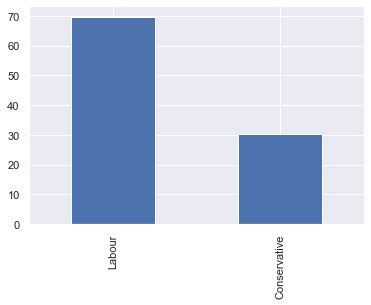

In [11]:
(data.Vote.value_counts(normalize=True)*100).plot(kind='bar')

In [12]:
data.Gender.value_counts()

female    812
male      713
Name: Gender, dtype: int64

In [13]:
data.Gender.replace('female','Female',inplace=True)
data.Gender.replace('male','Male',inplace=True)

In [14]:
data.isnull().sum()

Vote                        0
Age                         0
Economic_Condn_National     0
Economic_Condn_Household    0
Blair                       0
Hague                       0
Europe                      0
Political_Knowledge         0
Gender                      0
dtype: int64

In [15]:
data.duplicated().sum()

8

In [16]:
data=data.drop_duplicates()

In [17]:
cat_var=['Economic_Condn_National', 'Economic_Condn_Household','Blair', 'Hague', 'Europe', 'Political_Knowledge']
cat_var

['Economic_Condn_National',
 'Economic_Condn_Household',
 'Blair',
 'Hague',
 'Europe',
 'Political_Knowledge']

In [18]:
data_eda=data.copy()

In [19]:
for col in cat_var:
    data_eda[col]=pd.Categorical(data_eda[col]) 

In [20]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Vote                      1517 non-null   object  
 1   Age                       1517 non-null   int64   
 2   Economic_Condn_National   1517 non-null   category
 3   Economic_Condn_Household  1517 non-null   category
 4   Blair                     1517 non-null   category
 5   Hague                     1517 non-null   category
 6   Europe                    1517 non-null   category
 7   Political_Knowledge       1517 non-null   category
 8   Gender                    1517 non-null   object  
dtypes: category(6), int64(1), object(2)
memory usage: 57.7+ KB


In [21]:
data_eda.describe(include='all')

,Vote,Age,Economic_Condn_National,Economic_Condn_Household,Blair,Hague,Europe,Political_Knowledge,Gender
count,1517,1517.000000,1517.0,1517.0,1517.0,1517.0,1517.0,1517.0,1517
unique,2,NaN,5.0,5.0,5.0,5.0,11.0,4.0,2
top,Labour,NaN,3.0,3.0,4.0,2.0,11.0,2.0,Female
freq,1057,NaN,604.0,645.0,833.0,617.0,338.0,776.0,808
mean,NaN,54.241266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,15.701741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
for col in cat_var:
    print(col,' : ',data_eda[col].nunique())
    print(((data_eda[col].value_counts(normalize=True)*100).round(2)).sort_index(),'\n')
print('Gender : ',data_eda.Gender.nunique())
(data_eda.Gender.value_counts(normalize=True)*100).round(2)

Economic_Condn_National  :  5
1     2.44
2    16.88
3    39.82
4    35.46
5     5.41
Name: Economic_Condn_National, dtype: float64 

Economic_Condn_Household  :  5
1     4.28
2    18.46
3    42.52
4    28.68
5     6.06
Name: Economic_Condn_Household, dtype: float64 

Blair  :  5
1     6.39
2    28.61
3     0.07
4    54.91
5    10.02
Name: Blair, dtype: float64 

Hague  :  5
1    15.36
2    40.67
3     2.44
4    36.72
5     4.81
Name: Hague, dtype: float64 

Europe  :  11
1      7.19
2      5.08
3      8.44
4      8.31
5      8.11
6     13.65
7      5.67
8      7.32
9      7.32
10     6.66
11    22.28
Name: Europe, dtype: float64 

Political_Knowledge  :  4
0    29.93
1     2.50
2    51.15
3    16.41
Name: Political_Knowledge, dtype: float64 

Gender :  2


Female    53.26
Male      46.74
Name: Gender, dtype: float64

## 1.2) Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000185519B63C8>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

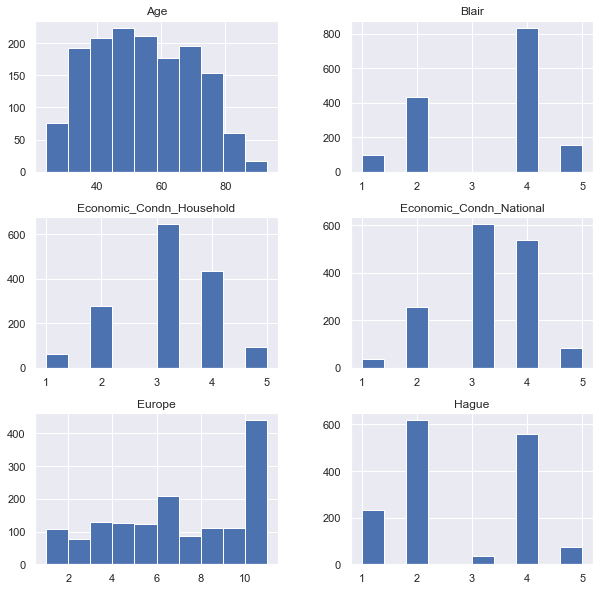

In [23]:
plt.figure()
data.hist(figsize=(10,10))

In [24]:
data_cont=data.select_dtypes(exclude='object')
data_cont

,Age,Economic_Condn_National,Economic_Condn_Household,Blair,Hague,Europe
0,43,3,3,4,1,2
1,36,4,4,4,4,5
2,35,4,4,5,2,3
3,24,4,2,2,1,4
4,41,2,2,1,1,6
...,...,...,...,...,...,...
1520,67,5,3,2,4,11
1521,73,2,2,4,4,8
1522,37,3,3,5,4,2
1523,61,3,3,1,4,11


In [25]:
data.Age.skew()

0.13979987012068112

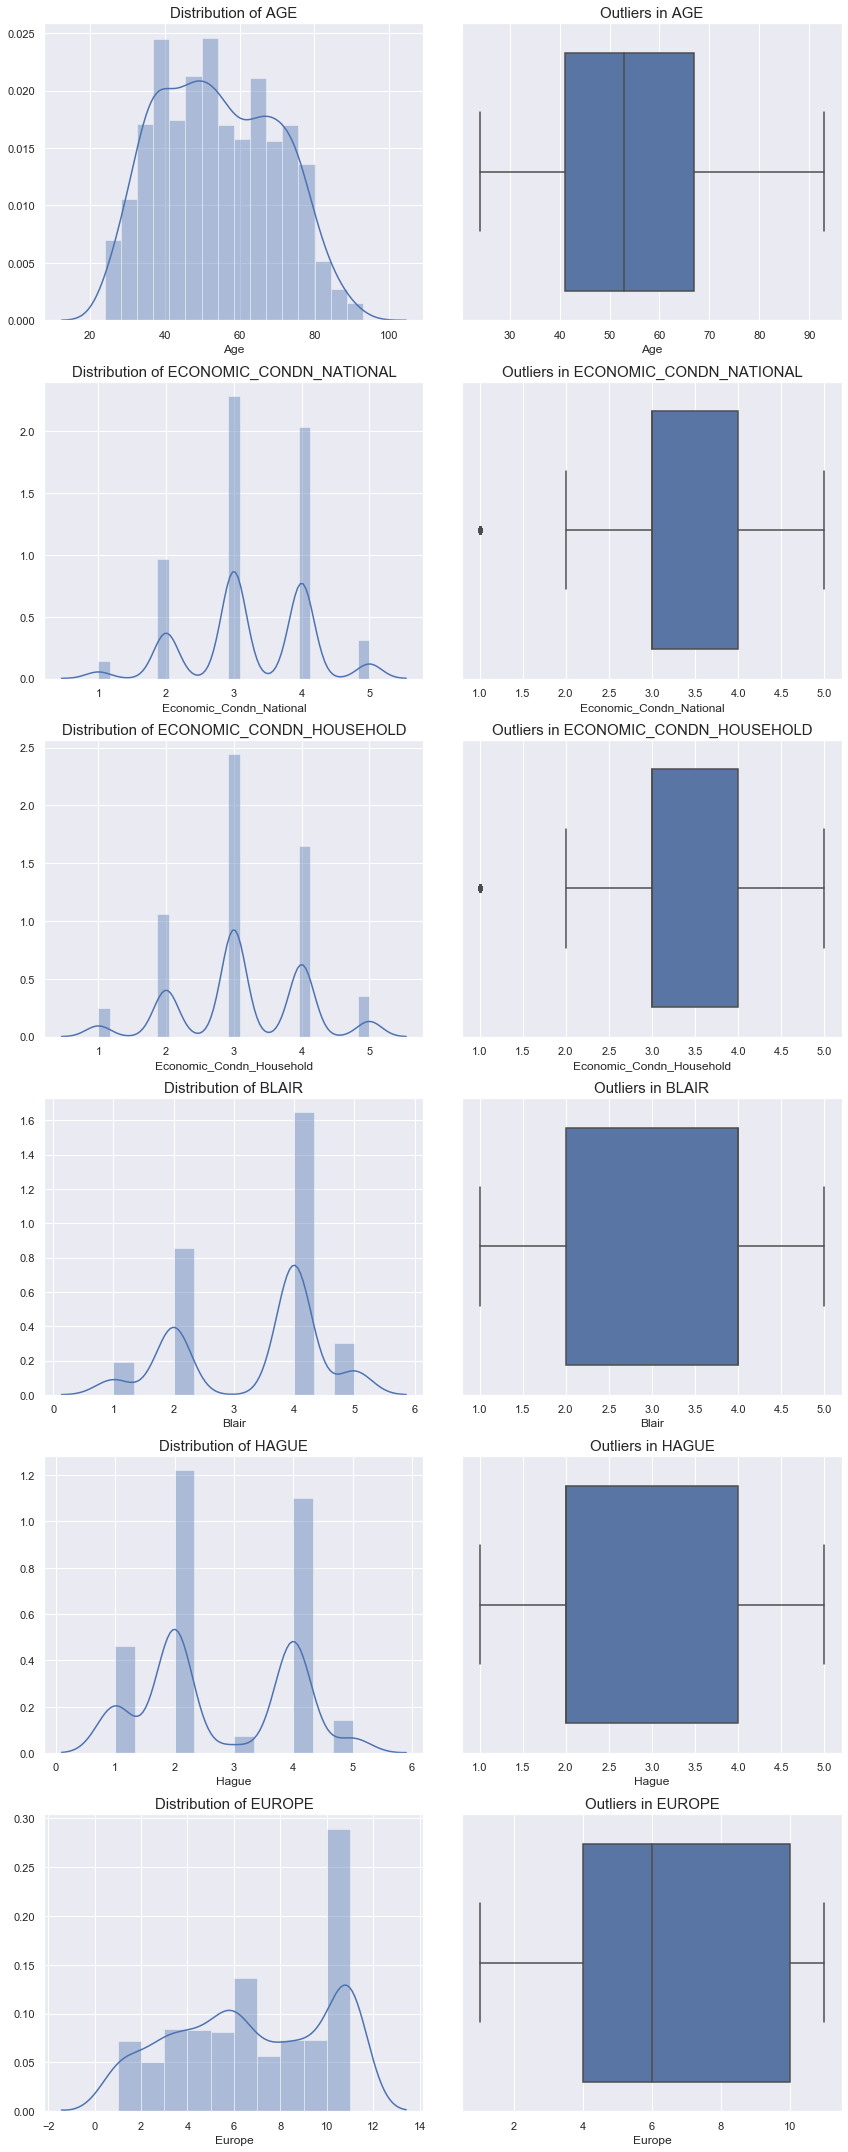

In [26]:
fig,ax=plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12,30)
for i in range(0,len(data_cont.columns)):
    a=sns.distplot(data[data_cont.columns[i]],ax=ax[i][0])
    a.set_title("Distribution of "+data_cont.columns[i].upper(),fontsize=15)
    a=sns.boxplot(data_cont[data_cont.columns[i]],ax=ax[i][1])
    a.set_title("Outliers in "+data_cont.columns[i].upper(),fontsize=15)
plt.tight_layout()
plt.savefig('univariate.jpg')

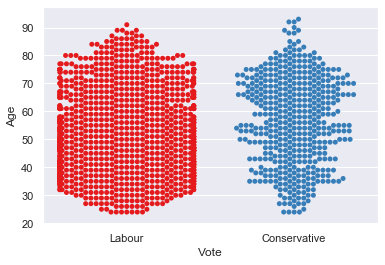

In [27]:
sns.swarmplot(data.Vote,data.Age,palette='Set1')

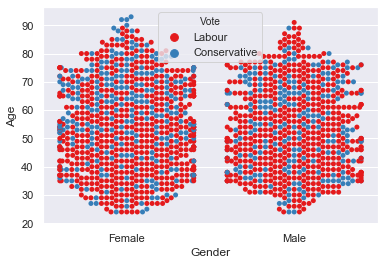

In [28]:
sns.swarmplot(data.Gender,data.Age,hue=data.Vote,palette='Set1')

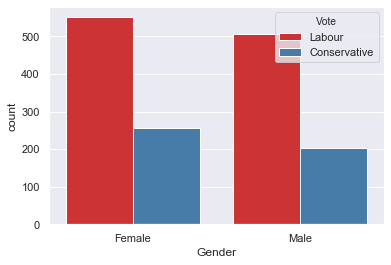

In [29]:
sns.countplot(data.Gender,hue=data.Vote,palette='Set1')

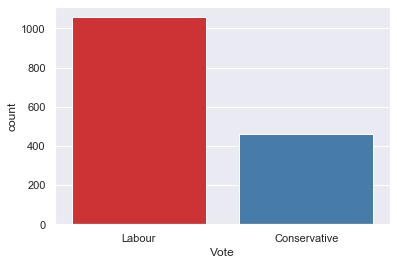

In [30]:
sns.countplot(data.Vote,palette='Set1')

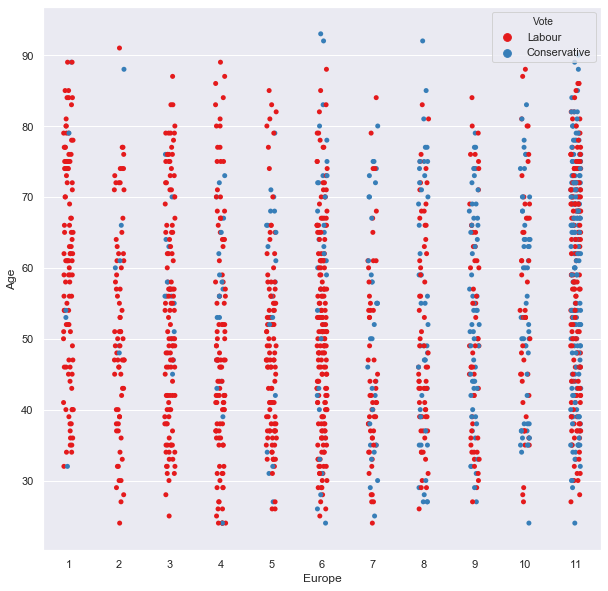

In [31]:
plt.figure(figsize=(10,10))
sns.stripplot('Europe','Age',data=data,hue='Vote',palette='Set1')

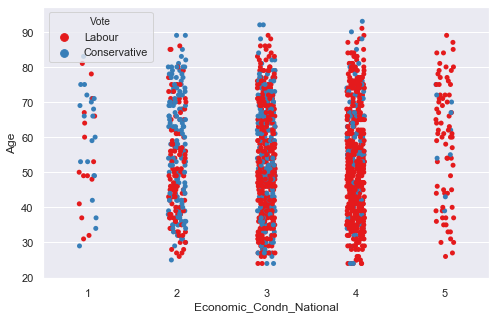

In [32]:
plt.figure(figsize=(8,5))
sns.stripplot('Economic_Condn_National','Age',data=data,hue='Vote',palette='Set1')

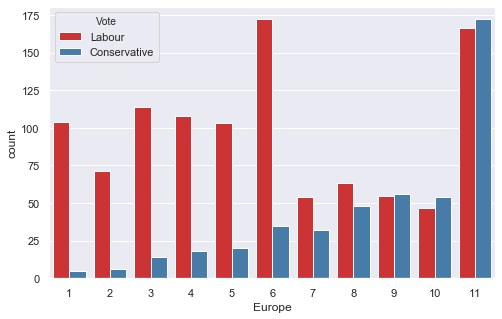

In [33]:
plt.figure(figsize=(8,5))
sns.countplot('Europe',data=data,hue='Vote',palette='Set1')

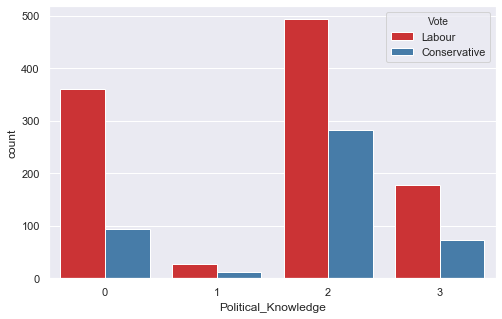

In [34]:
plt.figure(figsize=(8,5))
sns.countplot('Political_Knowledge',data=data,hue='Vote',palette='Set1')

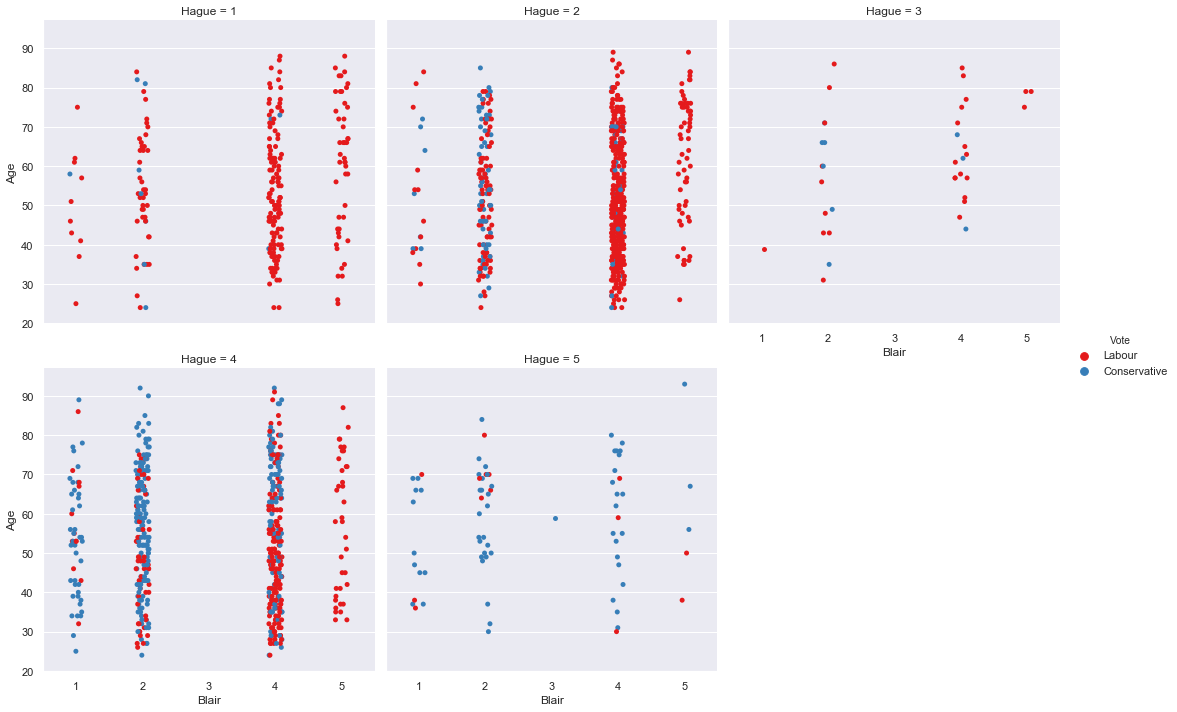

In [35]:
sns.catplot('Blair','Age',data=data,hue='Vote',col='Hague',col_wrap=3,palette='Set1')

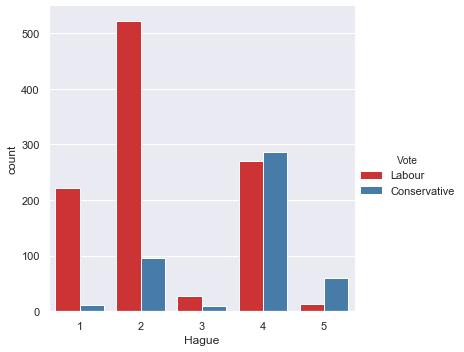

In [36]:
sns.catplot(kind='count',data=data,x='Hague',hue='Vote',palette='Set1')

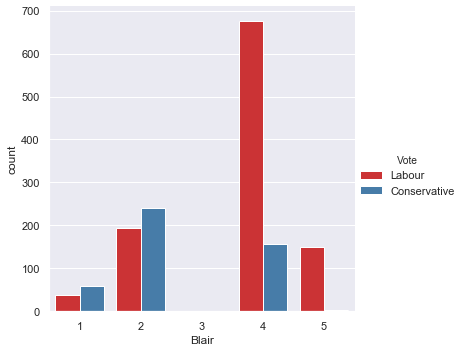

In [37]:
sns.catplot(kind='count',data=data,x='Blair',hue='Vote',palette='Set1')

In [38]:
data[data.Blair==data.Hague][['Vote','Blair','Hague']].count()

Vote     422
Blair    422
Hague    422
dtype: int64

In [39]:
data[data.Blair==data.Hague][['Vote','Blair','Hague']].groupby('Vote').count()

,Blair,Hague
Vote,,
Conservative,157,157
Labour,265,265


In [40]:
data[data.Blair>data.Hague][['Vote','Blair','Hague']].groupby('Vote').count()

,Blair,Hague
Vote,,
Conservative,46,46
Labour,692,692


In [41]:
data[data.Blair<data.Hague][['Vote','Blair','Hague']].groupby('Vote').count()

,Blair,Hague
Vote,,
Conservative,257,257
Labour,100,100


In [42]:
pd.crosstab(data.Vote,data.Blair)

Blair,1,2,3,4,5
Vote,,,,,
Conservative,59,240,1,157,3
Labour,38,194,0,676,149


In [43]:
pd.crosstab(data.Vote,data.Hague)

Hague,1,2,3,4,5
Vote,,,,,
Conservative,11,95,9,286,59
Labour,222,522,28,271,14


In [44]:
422/len(data)*100

27.81806196440343

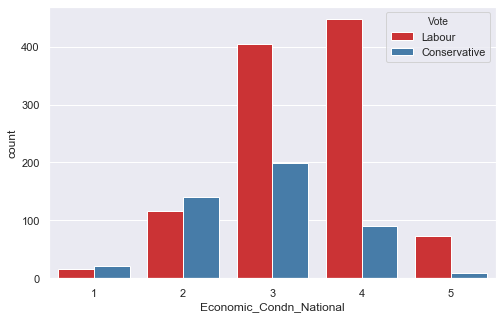

In [45]:
plt.figure(figsize=(8,5))
sns.countplot('Economic_Condn_National',data=data,hue='Vote',palette='Set1')

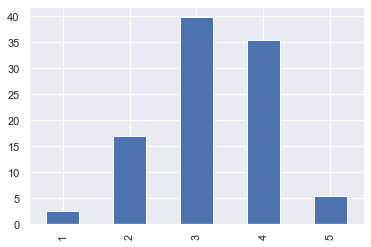

In [46]:
((data.Economic_Condn_National.value_counts(normalize=True)*100).round(2)).sort_index().plot(kind='bar')

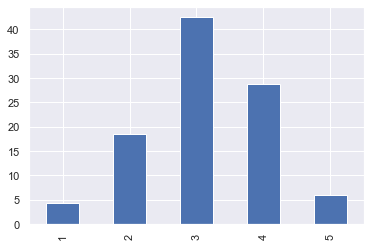

In [47]:
((data.Economic_Condn_Household.value_counts(normalize=True)*100).round(2)).sort_index().plot(kind='bar')

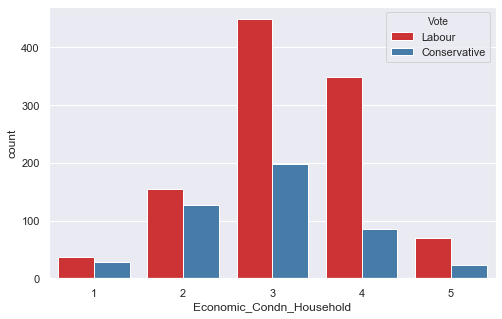

In [48]:
plt.figure(figsize=(8,5))
sns.countplot('Economic_Condn_Household',data=data,hue='Vote',palette='Set1')

In [49]:
age_bin=pd.cut(data.Age,[23,30,40,50,60,70,80,94],labels=['20s','30s','40s','50s','60s','70s','80s'])

In [50]:
data['age_label']=age_bin

In [51]:
data.Age.describe()

count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: Age, dtype: float64

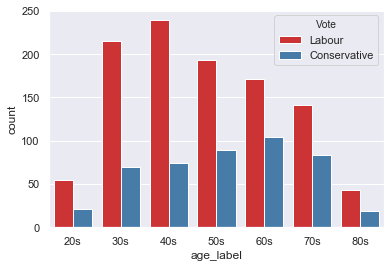

In [52]:
sns.countplot(data.age_label,hue=data.Vote,palette='Set1')

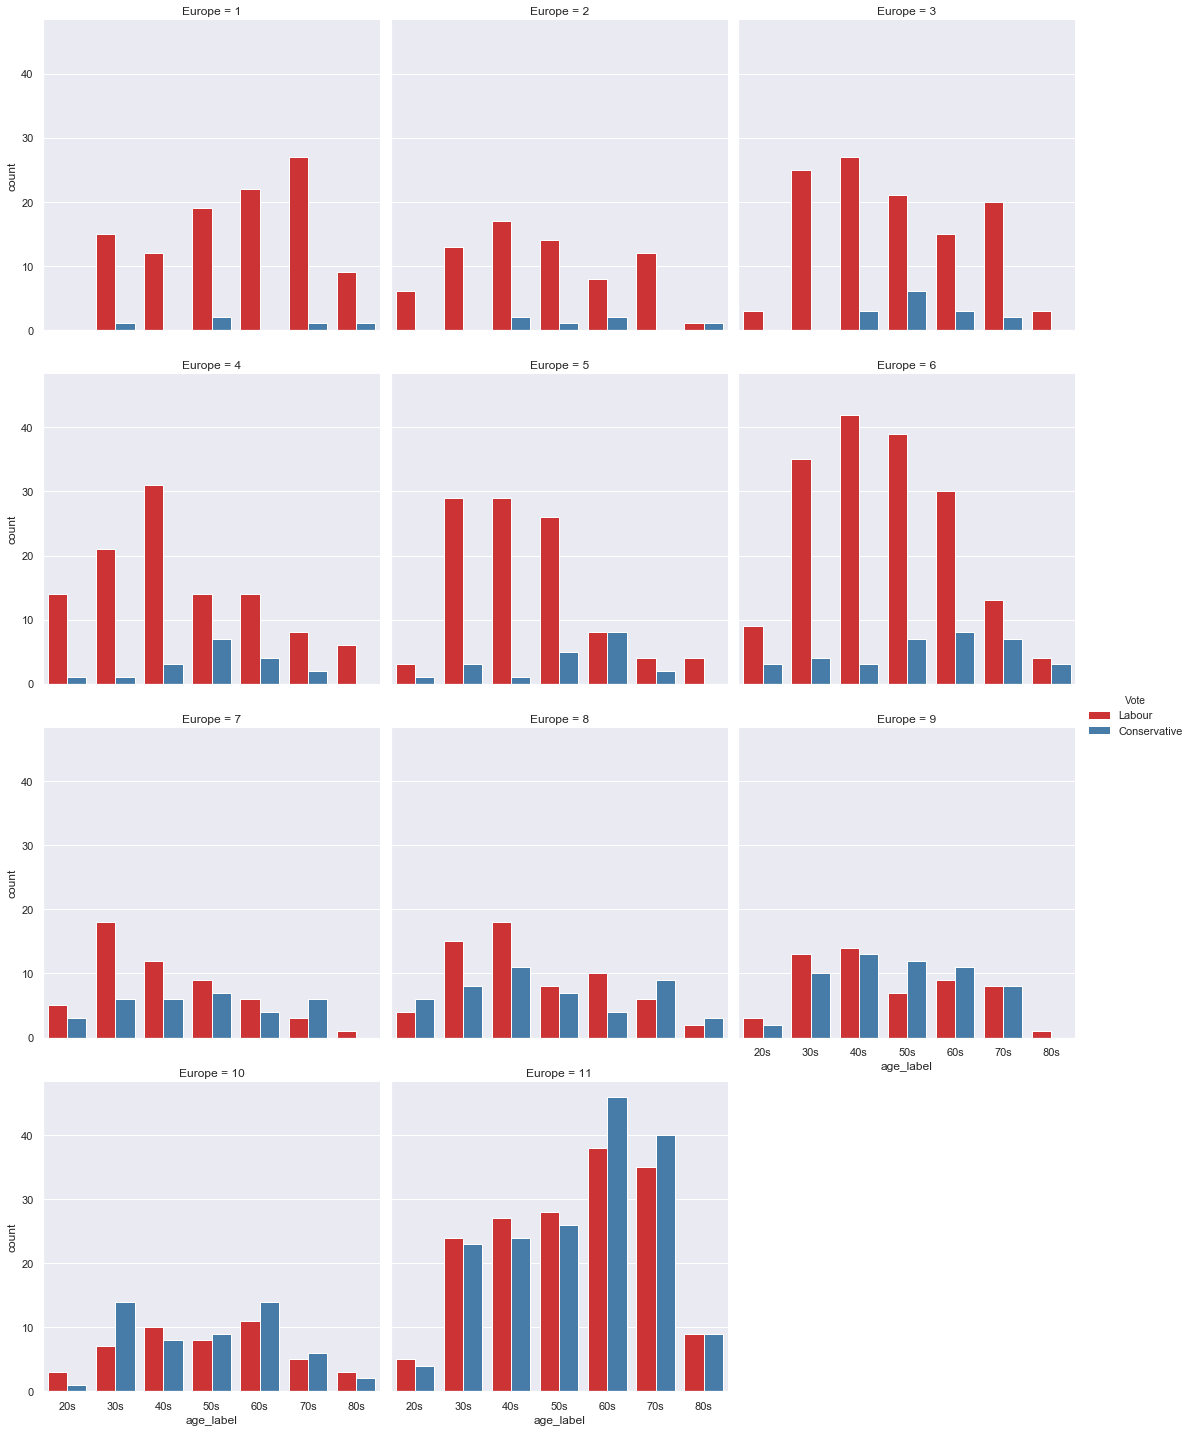

In [53]:
sns.catplot('age_label',hue='Vote',kind='count',col='Europe',col_wrap=3,data=data,palette='Set1')
plt.savefig('europe.jpg')

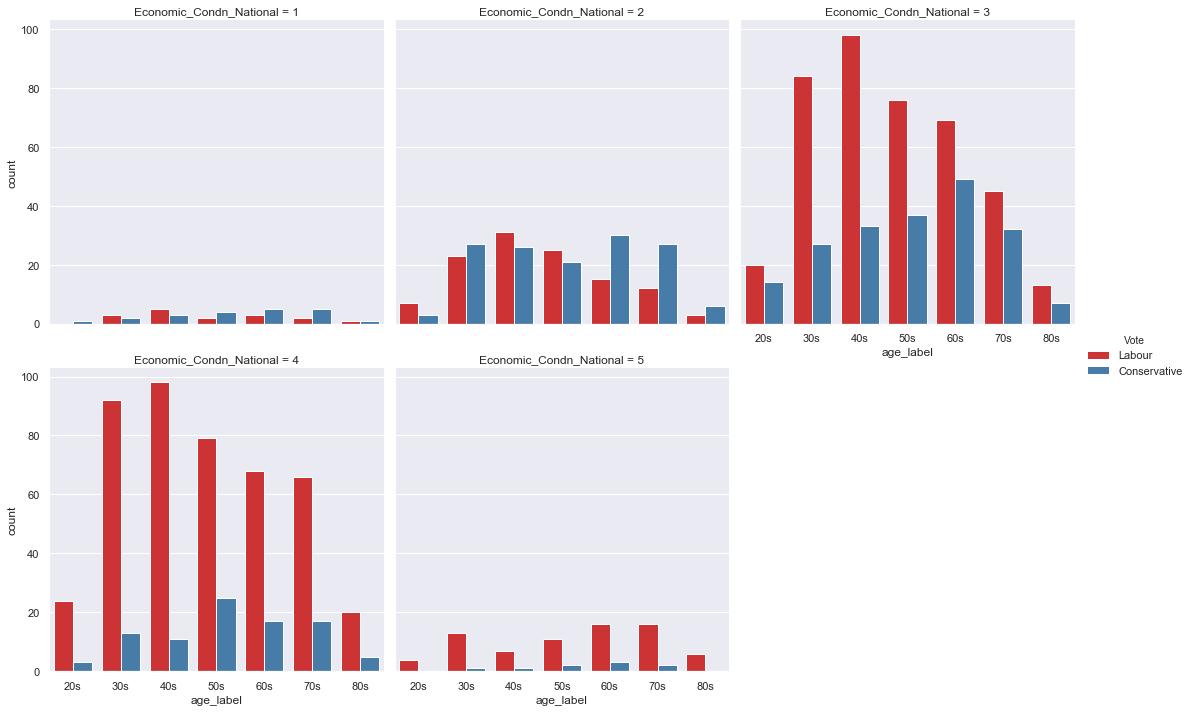

In [54]:
sns.catplot('age_label',hue='Vote',kind='count',col='Economic_Condn_National',col_wrap=3,data=data,palette='Set1')

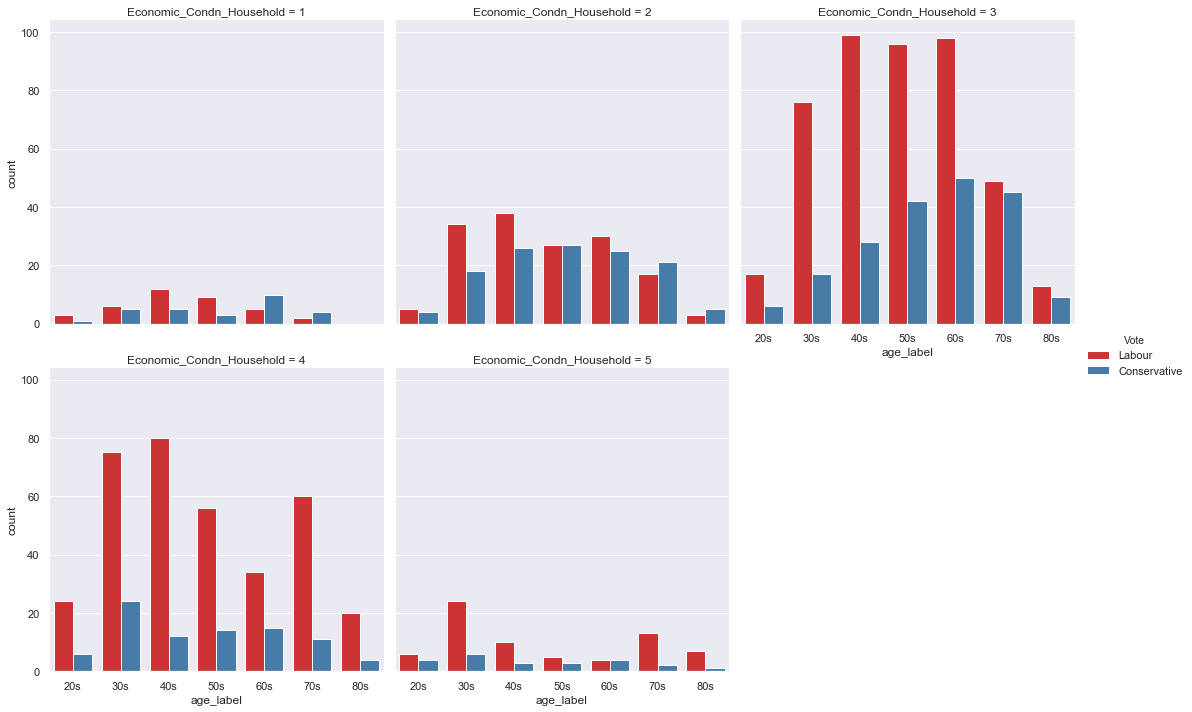

In [55]:
sns.catplot('age_label',hue='Vote',kind='count',col='Economic_Condn_Household',col_wrap=3,data=data,palette='Set1')

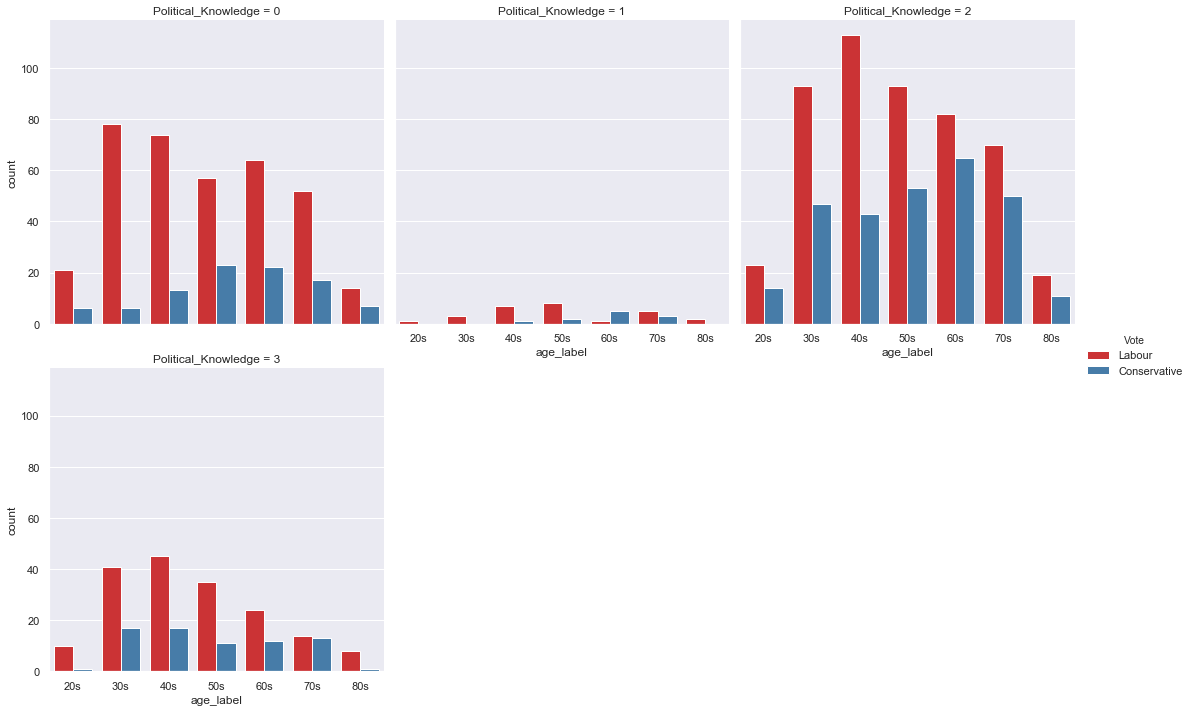

In [56]:
sns.catplot('age_label',hue='Vote',kind='count',col='Political_Knowledge',col_wrap=3,data=data,palette='Set1')

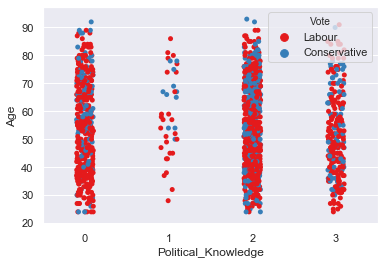

In [57]:
sns.stripplot(data.Political_Knowledge,data.Age,hue=data.Vote,palette='Set1')

In [58]:
data.columns

Index(['Vote', 'Age', 'Economic_Condn_National', 'Economic_Condn_Household',
       'Blair', 'Hague', 'Europe', 'Political_Knowledge', 'Gender',
       'age_label'],
      dtype='object')

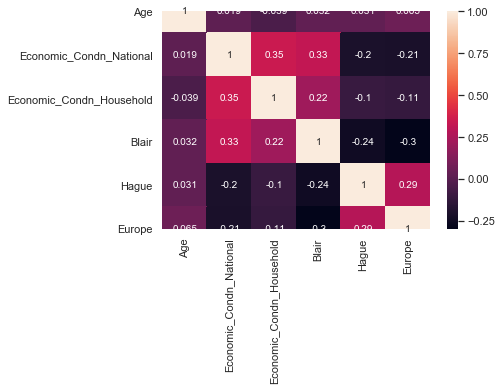

In [59]:
sns.heatmap(data.corr(),annot=True)

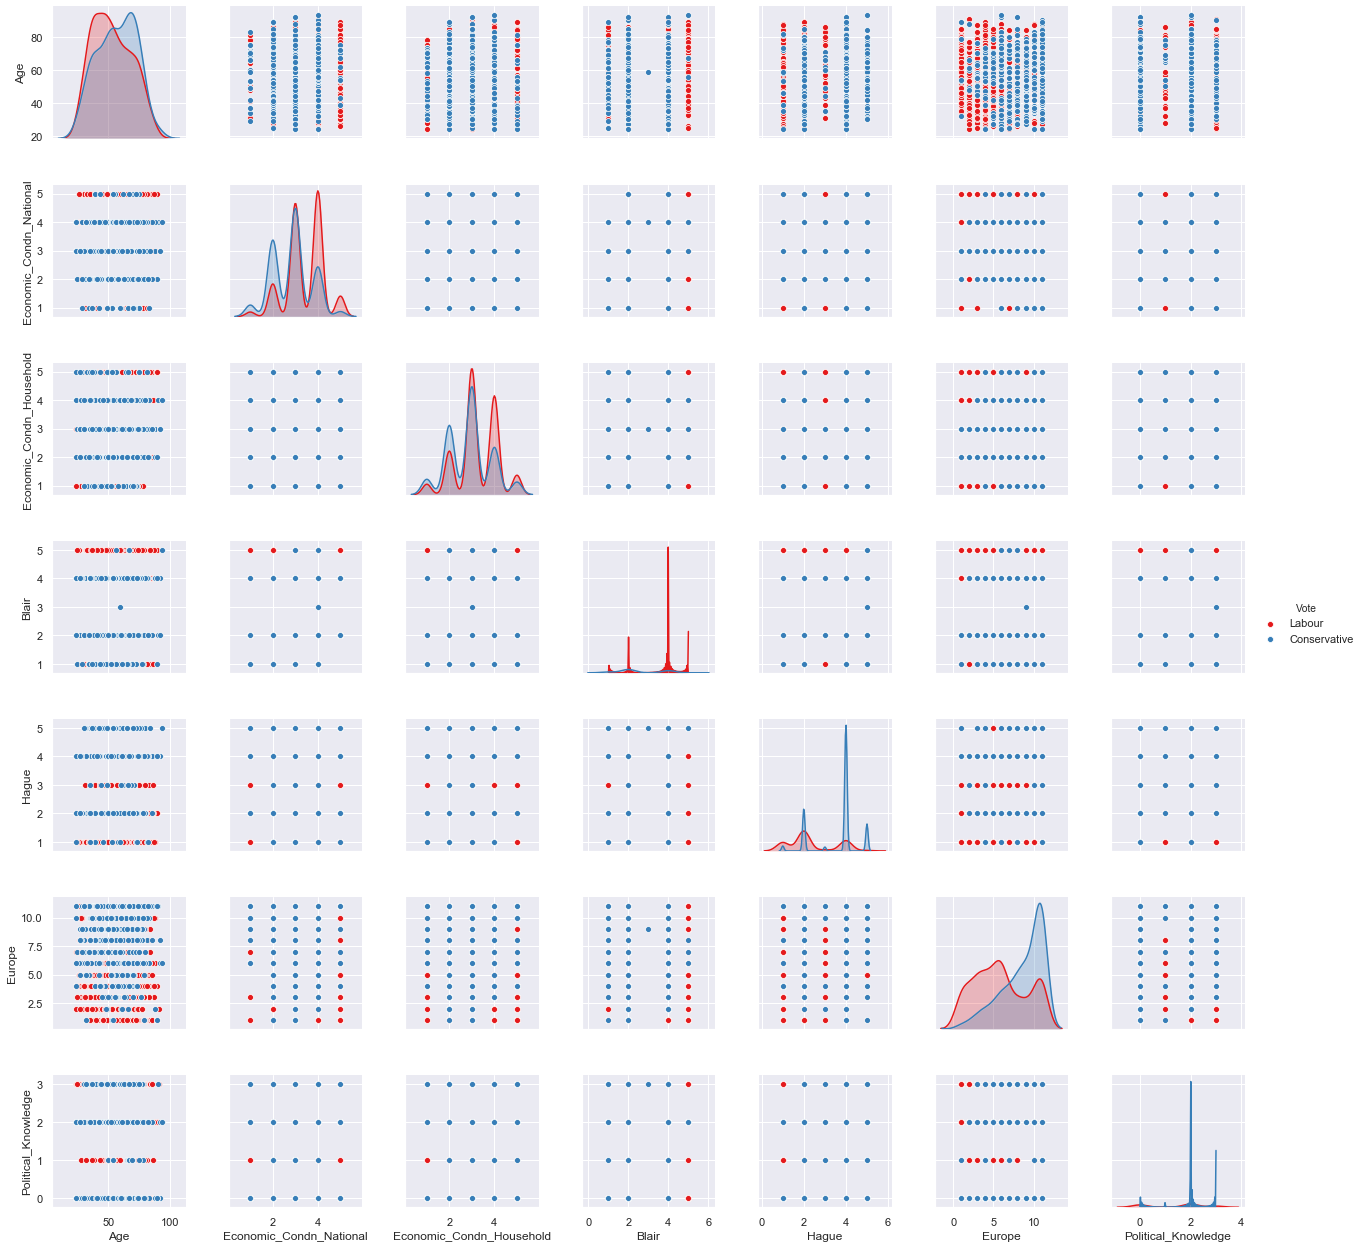

In [60]:
sns.pairplot(data,hue='Vote',palette='Set1')
plt.savefig('pairplot.jpg')

## 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).	

In [61]:
data.head()

,Vote,Age,Economic_Condn_National,Economic_Condn_Household,Blair,Hague,Europe,Political_Knowledge,Gender,age_label
0,Labour,43,3,3,4,1,2,2,Female,40s
1,Labour,36,4,4,4,4,5,2,Male,30s
2,Labour,35,4,4,5,2,3,2,Male,30s
3,Labour,24,4,2,2,1,4,0,Female,20s
4,Labour,41,2,2,1,1,6,2,Male,40s


In [62]:
data.Vote=pd.Categorical(data.Vote).codes
data.Gender=pd.Categorical(data.Gender).codes

In [63]:
polt_know=pd.get_dummies(data.Political_Knowledge,prefix='Polt_Knowldg')
data=data.join(polt_know)

In [64]:
data.drop('Political_Knowledge',axis=1,inplace=True)

In [65]:
fav_leader=[]
data_feature=data.copy()
for ind,row in data_feature.iterrows():
    if row.Blair > row.Hague:
        fav_leader.append('Blair')
    elif row.Hague > row.Blair:
        fav_leader.append('Hague')
    elif row.Blair == row.Hague:
        fav_leader.append('Equal')
data_feature['Leader']=fav_leader
data_feature.drop(['Blair','Hague'],axis=1,inplace=True)
data_feature=pd.get_dummies(data_feature)

In [66]:
data_feature.head()

,Vote,Age,Economic_Condn_National,Economic_Condn_Household,Europe,Gender,Polt_Knowldg_0,Polt_Knowldg_1,Polt_Knowldg_2,Polt_Knowldg_3,age_label_20s,age_label_30s,age_label_40s,age_label_50s,age_label_60s,age_label_70s,age_label_80s,Leader_Blair,Leader_Equal,Leader_Hague
0,1,43,3,3,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,1,36,4,4,5,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,1,35,4,4,3,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,1,24,4,2,4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,41,2,2,6,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [67]:
# Split X and y into training and test set in 70:30 ratio
x = data.drop(columns=['Vote','age_label'])
y = data['Vote']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)

In [68]:
print('Train set dimensions :',x_train.shape,y_train.shape)
print('Test set dimensions :',x_test.shape,y_test.shape)

Train set dimensions : (1061, 11) (1061,)
Test set dimensions : (456, 11) (456,)


In [69]:
y_train.value_counts(normalize=True).round(2)

1    0.7
0    0.3
Name: Vote, dtype: float64

In [70]:
y_test.value_counts(normalize=True).round(2)

1    0.7
0    0.3
Name: Vote, dtype: float64

Scaling is necessary for KNN since its a distance based algorithm

Standardization isn't required for logistic regression. The main goal of standardizing features is to help convergence of the technique used for optimization.
Standardizing the features makes the convergence faster. Otherwise, you can run your logistic regression without any standardization treatment on the features.

SVM deals with distance metrics and variables in higher range will influence distance more. So scaling is needed in SVM



In [71]:
def basemodel_metrics(model,x,y,text):
    if text=='train':
        print('\t\tTrain Data\n')
        data_type='Train data'
    elif text=='test':
        print('\t\tTest Data\n')
        data_type='Test data'
    y_predict=model.predict(x)
    model_score = model.score(x, y)
    print('Accuracy score',model_score.round(2))
    print('\nClassification Report\n',metrics.classification_report(y,y_predict))
    print('Confusion matrix :\n',metrics.confusion_matrix(y, y_predict))

In [72]:
def performance_metrics_train(best_grid,x_train,y_train):
    ytrain_predict_final=best_grid.predict(x_train)
    best_score = best_grid.score(x_train, y_train)
    print('Training data accuracy score',best_score.round(2))

    print('\n\t\t\bClassification Report - Training data\n',metrics.classification_report(y_train,ytrain_predict_final))

    fig, ax = plt.subplots()
    sns.heatmap(metrics.confusion_matrix(y_train, ytrain_predict_final),annot=True, fmt='d', cbar=False,cmap='YlGnBu',
                xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'],annot_kws={"size": 20})
    ax.set_ylim([0,2])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix - Train data',fontsize=20)

    # predict probabilities
    probs = best_grid.predict_proba(x_train)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = metrics.roc_auc_score(y_train, probs)*100
    print('ROC AUC Score: %.1f' % auc.round(2),'%')
    # calculate roc curve
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, probs)
    fig, ax = plt.subplots()
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the best model
    plt.plot(train_fpr, train_tpr)
    plt.title('ROC Curve - Train data',fontsize=20)


In [73]:
def performance_metrics_test(best_grid,x_test,y_test):
    ytest_predict_final = best_grid.predict(x_test)
    model_score = best_grid.score(x_test, y_test)
    print('Test data accuracy score  :',model_score.round(2))

    print('\n\nClassification Report - Test data\n',metrics.classification_report(y_test,ytest_predict_final))

    fig, ax = plt.subplots()
    sns.heatmap(metrics.confusion_matrix(y_test, ytest_predict_final),annot=True, fmt='d', cbar=False,cmap='YlGnBu',
                xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'],annot_kws={"size": 18})
    ax.set_ylim([0,2])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix - Test data',fontsize=20)
    
    # predict probabilities
    probs = best_grid.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = metrics.roc_auc_score(y_test, probs)*100
    print('ROC AUC Score: %.1f' % auc.round(2),'%')
    # calculate roc curve
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, probs)
    fig, ax = plt.subplots()
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the best_model
    plt.plot(test_fpr, test_tpr)
    plt.title('ROC Curve - Test data',fontsize=20)

## 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis).

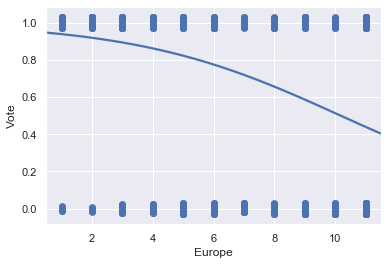

In [74]:
sns.regplot('Europe','Vote',y_jitter=0.03,data=data,logistic=True,ci=None)

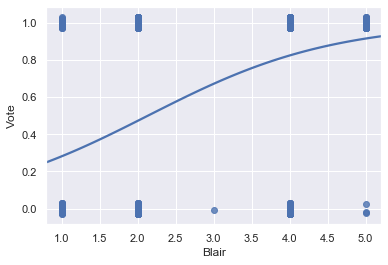

In [75]:
sns.regplot('Blair','Vote',y_jitter=0.03,data=data,logistic=True,ci=None)

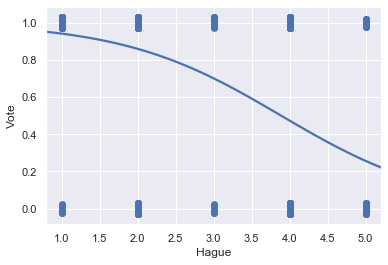

In [76]:
sns.regplot('Hague','Vote',y_jitter=0.03,data=data,logistic=True,ci=None)

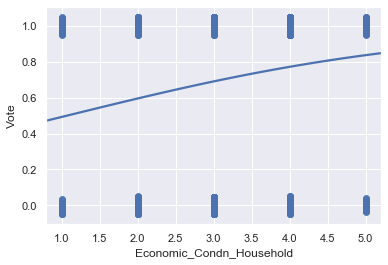

In [77]:
sns.regplot('Economic_Condn_Household','Vote',y_jitter=0.05,data=data,logistic=True,ci=None)

In [78]:
x_train.head()

,Age,Economic_Condn_National,Economic_Condn_Household,Blair,Hague,Europe,Gender,Polt_Knowldg_0,Polt_Knowldg_1,Polt_Knowldg_2,Polt_Knowldg_3
1038,29,4,3,4,4,6,0,0,0,0,1
158,55,4,4,2,2,4,1,1,0,0,0
907,30,3,3,2,4,8,0,1,0,0,0
972,38,3,4,4,2,3,0,0,0,1,0
843,44,3,1,4,2,6,1,0,0,1,0


In [79]:
clfLR = LogisticRegression(max_iter=1000)
clfLR.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [80]:
basemodel_metrics(clfLR,x_train,y_train,'train')

		Train Data

Accuracy score 0.84

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.67      0.72       321
           1       0.87      0.91      0.89       740

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061

Confusion matrix :
 [[216 105]
 [ 64 676]]


In [81]:
basemodel_metrics(clfLR,x_test,y_test,'test')

		Test Data

Accuracy score 0.82

Classification Report
               precision    recall  f1-score   support

           0       0.72      0.66      0.69       139
           1       0.86      0.89      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456

Confusion matrix :
 [[ 92  47]
 [ 35 282]]


In [82]:
clfLR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [83]:
pd.DataFrame(clfLR.coef_.round(2),columns=x_train.columns)

,Age,Economic_Condn_National,Economic_Condn_Household,Blair,Hague,Europe,Gender,Polt_Knowldg_0,Polt_Knowldg_1,Polt_Knowldg_2,Polt_Knowldg_3
0,-0.02,0.36,0.07,0.64,-0.9,-0.22,-0.12,0.54,0.31,-0.48,-0.38


In [84]:
param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 10),
    'solver' : ['liblinear','lbfgs'],
    "tol" : [0.0001,0.0002,0.0003],
    "max_iter": [100,200,300]
    }

             
# Create grid search object

grid_search = GridSearchCV(clfLR, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 1141 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   28.1s finished
C:\Users\chith\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             verbose=True)

### Model tuning - Logistic Regression

In [85]:
best_grid=grid_search.best_estimator_
print('Best hyper parameters after tuning \n',grid_search.best_params_)
print('\nAccuracy score',grid_search.score(x_train, y_train).round(2))

Best hyper parameters after tuning 
 {'C': 0.046415888336127774, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}

Accuracy score 0.84


Training data accuracy score 0.84

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.78      0.65      0.71       321
           1       0.86      0.92      0.89       740

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061

ROC AUC Score: 89.5 %


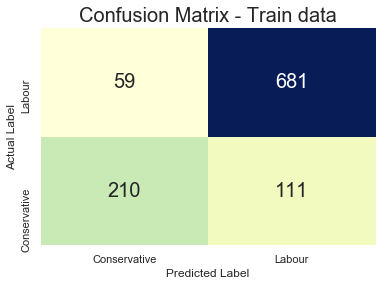

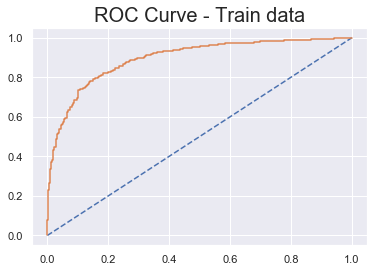

In [86]:
performance_metrics_train(best_grid,x_train,y_train)

Test data accuracy score  : 0.82


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.72      0.64      0.68       139
           1       0.85      0.89      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456

ROC AUC Score: 87.5 %


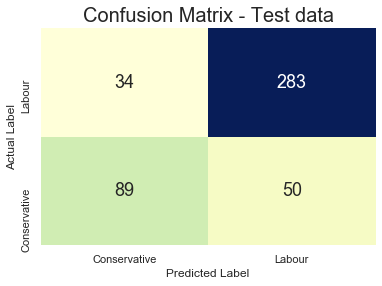

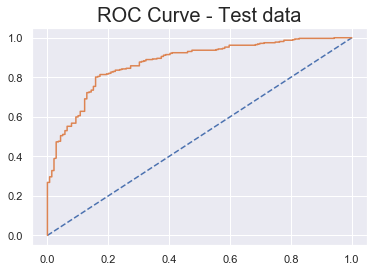

In [87]:
performance_metrics_test(best_grid,x_test,y_test)

### Linear Discriminant Analysis

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(x_train, y_train)

basemodel_metrics(clfLDA,x_train,y_train,'train')

basemodel_metrics(clfLDA,x_test,y_test,'test')


		Train Data

Accuracy score 0.84

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       321
           1       0.87      0.91      0.89       740

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061

Confusion matrix :
 [[221 100]
 [ 69 671]]
		Test Data

Accuracy score 0.82

Classification Report
               precision    recall  f1-score   support

           0       0.72      0.67      0.69       139
           1       0.86      0.88      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456

Confusion matrix :
 [[ 93  46]
 [ 37 280]]


In [89]:
clfLDA

LinearDiscriminantAnalysis()

In [90]:
clfLDA.get_params()

{'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [91]:
param_grid={'solver':['svd'], #, 'lsqr', 'eigen'
           "tol" : [0.0001,0.005]} #,0.0002,0.0003
grid_search = GridSearchCV(estimator = clfLDA, param_grid = param_grid, cv = 3,verbose=True,n_jobs=-1)
grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd'], 'tol': [0.0001, 0.005]},
             verbose=True)

In [92]:
best_grid=grid_search.best_estimator_
print(grid_search.best_params_)
print(grid_search.score(x_train, y_train))


{'solver': 'svd', 'tol': 0.0001}
0.8407163053722903


In [93]:
#This is same as base model

### Performance metrics - LDA

Training data accuracy score 0.84

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       321
           1       0.87      0.91      0.89       740

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061

ROC AUC Score: 89.6 %


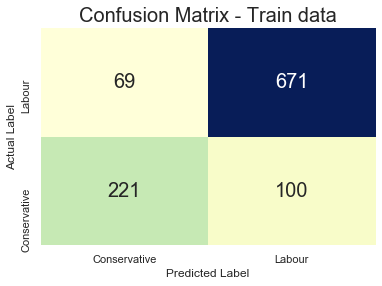

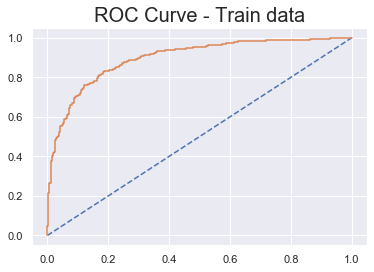

In [94]:
performance_metrics_train(clfLDA,x_train,y_train)

Test data accuracy score  : 0.82


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.72      0.67      0.69       139
           1       0.86      0.88      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456

ROC AUC Score: 87.6 %


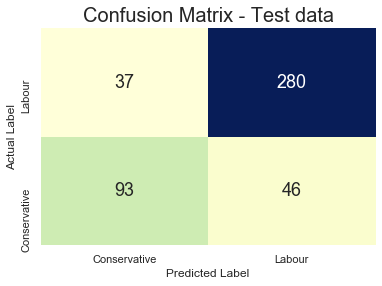

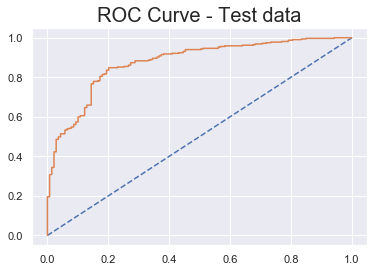

In [95]:
performance_metrics_test(clfLDA,x_test,y_test)


## 1.5) Apply KNN Model, Naïve Bayes Model and Support Vector Machine (SVM) model.	

### KNN

In [96]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train) #scaling the data since KNN is a distance based algorithm.
x_test_scaled=ss.transform(x_test)
clfKNN=KNeighborsClassifier()
clfKNN.fit(x_train_scaled,y_train)

basemodel_metrics(clfKNN,x_train_scaled,y_train,'train')

basemodel_metrics(clfKNN,x_test_scaled,y_test,'test')

		Train Data

Accuracy score 0.87

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.72      0.76       321
           1       0.88      0.93      0.91       740

    accuracy                           0.87      1061
   macro avg       0.85      0.82      0.84      1061
weighted avg       0.86      0.87      0.86      1061

Confusion matrix :
 [[231  90]
 [ 52 688]]
		Test Data

Accuracy score 0.81

Classification Report
               precision    recall  f1-score   support

           0       0.72      0.63      0.67       139
           1       0.85      0.89      0.87       317

    accuracy                           0.81       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.81      0.81      0.81       456

Confusion matrix :
 [[ 88  51]
 [ 35 282]]


In [97]:
clfKNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [98]:
clfKNN.fit(x_train_scaled,y_train)

KNeighborsClassifier()

### Model tuning - KNN

In [99]:
param_grid={'leaf_size':[20,30,40],
           "n_neighbors" : [10,12,14,16,20],#4,6,8
            "p":[1,2]}
grid_search = GridSearchCV(estimator = clfKNN, param_grid = param_grid, cv = 3,verbose=True,n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [20, 30, 40],
                         'n_neighbors': [10, 12, 14, 16, 20], 'p': [1, 2]},
             verbose=True)

In [100]:
best_grid=grid_search.best_estimator_
print(grid_search.best_params_)
print(grid_search.score(x_train_scaled, y_train))

{'leaf_size': 20, 'n_neighbors': 20, 'p': 1}
0.8444863336475024


### Performance metrics - KNN

Training data accuracy score 0.84

		Classification Report - Training data
               precision    recall  f1-score   support

           0       0.80      0.65      0.72       321
           1       0.86      0.93      0.89       740

    accuracy                           0.84      1061
   macro avg       0.83      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061

ROC AUC Score: 91.5 %


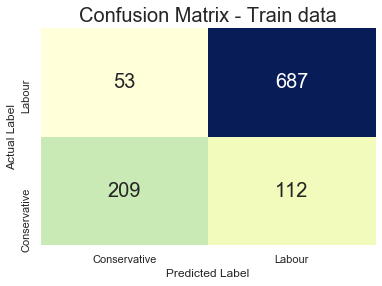

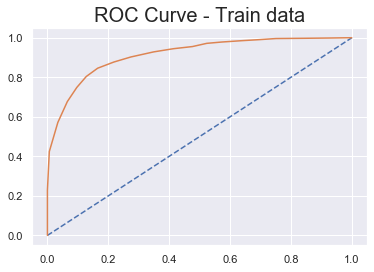

In [101]:
performance_metrics_train(best_grid,x_train_scaled,y_train)

Test data accuracy score  : 0.82


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.74      0.66      0.70       139
           1       0.86      0.90      0.88       317

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456

ROC AUC Score: 86.3 %


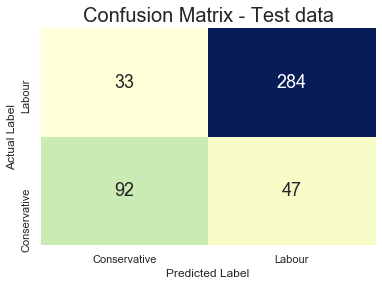

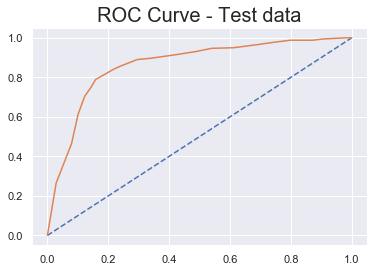

In [102]:
performance_metrics_test(best_grid,x_test_scaled,y_test)

### Naive Bayes

Training data accuracy score 0.83

		Classification Report - Training data
               precision    recall  f1-score   support

           0       0.73      0.70      0.72       321
           1       0.87      0.89      0.88       740

    accuracy                           0.83      1061
   macro avg       0.80      0.80      0.80      1061
weighted avg       0.83      0.83      0.83      1061

ROC AUC Score: 88.8 %


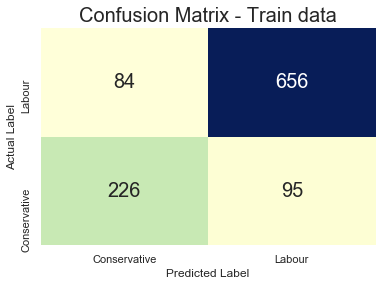

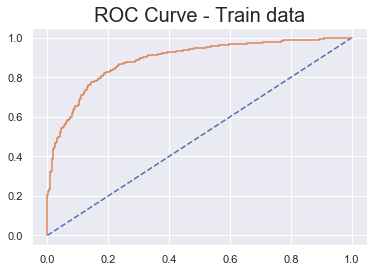

In [103]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
clfGaussian = GaussianNB()
clfGaussian.fit(x_train, y_train)

performance_metrics_train(clfGaussian,x_train,y_train)


In [104]:
clfGaussian

GaussianNB()

In [105]:
clfGaussian.get_params()

{'priors': None, 'var_smoothing': 1e-09}

Test data accuracy score  : 0.8


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       139
           1       0.86      0.86      0.86       317

    accuracy                           0.80       456
   macro avg       0.77      0.77      0.77       456
weighted avg       0.80      0.80      0.80       456

ROC AUC Score: 87.3 %


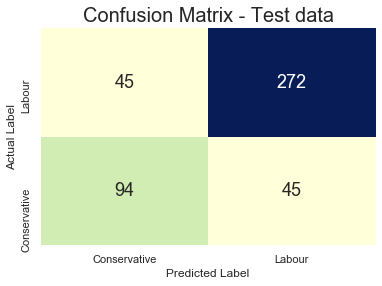

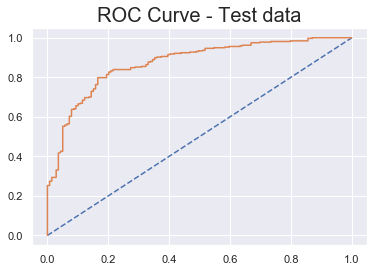

In [106]:
performance_metrics_test(clfGaussian,x_test,y_test)


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Vote                      1517 non-null   int8    
 1   Age                       1517 non-null   int64   
 2   Economic_Condn_National   1517 non-null   int64   
 3   Economic_Condn_Household  1517 non-null   int64   
 4   Blair                     1517 non-null   int64   
 5   Hague                     1517 non-null   int64   
 6   Europe                    1517 non-null   int64   
 7   Gender                    1517 non-null   int8    
 8   age_label                 1517 non-null   category
 9   Polt_Knowldg_0            1517 non-null   uint8   
 10  Polt_Knowldg_1            1517 non-null   uint8   
 11  Polt_Knowldg_2            1517 non-null   uint8   
 12  Polt_Knowldg_3            1517 non-null   uint8   
dtypes: category(1), int64(6), int8(2), uint8(4)
memo

### Support Vector Machine

In [108]:
#Scaled data
from sklearn import svm

clfSVM = svm.SVC(probability=True)
clfSVM.fit(x_train_scaled, y_train)

basemodel_metrics(clfSVM,x_train_scaled,y_train,'train')

basemodel_metrics(clfSVM,x_test_scaled,y_test,'test')

		Train Data

Accuracy score 0.88

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.74      0.78       321
           1       0.89      0.94      0.91       740

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.87      0.88      0.87      1061

Confusion matrix :
 [[236  85]
 [ 46 694]]
		Test Data

Accuracy score 0.81

Classification Report
               precision    recall  f1-score   support

           0       0.71      0.63      0.67       139
           1       0.85      0.89      0.87       317

    accuracy                           0.81       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.80      0.81      0.81       456

Confusion matrix :
 [[ 88  51]
 [ 36 281]]


In [109]:
clfSVM.decision_function_shape

'ovr'

In [110]:
clfSVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [111]:
param_grid = {'C':[0.25,0.5],  # penalty parameter C of the error term - 1.0,2.0, 3.0
              'kernel':['linear'], # specifies the kernel type to be used in the algorithm  
              #'gamma':[0.02, 0.08,0.2,1.0] # kernel coefficient for 'rbf'
             }
grid_search = GridSearchCV(estimator = clfSVM, param_grid = param_grid, cv = 3,verbose=True,n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.25, 0.5], 'kernel': ['linear']}, verbose=True)

In [112]:
best_grid_svm=grid_search.best_estimator_
grid_search.best_params_

{'C': 0.25, 'kernel': 'linear'}

In [113]:
#linear
grid_search.score(x_train_scaled, y_train),grid_search.best_score_


(0.8407163053722903, 0.8322343325704349)

Training data accuracy score 0.84

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       321
           1       0.87      0.91      0.89       740

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061

ROC AUC Score: 89.5 %


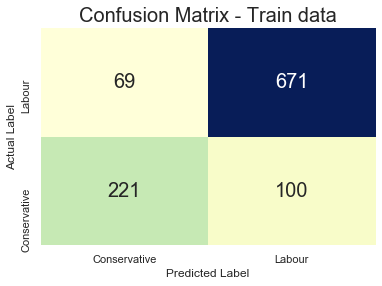

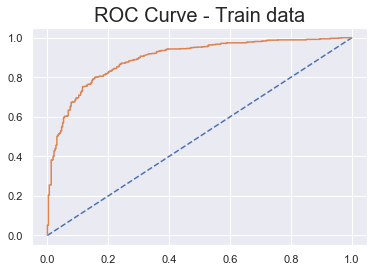

In [114]:
performance_metrics_train(best_grid_svm,x_train_scaled,y_train)

Test data accuracy score  : 0.82


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.72      0.67      0.69       139
           1       0.86      0.88      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456

ROC AUC Score: 87.4 %


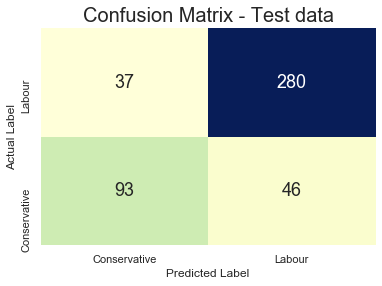

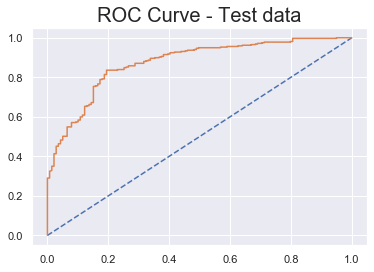

In [115]:
performance_metrics_test(best_grid_svm,x_test_scaled,y_test)

## 1.6) Model Tuning, Bagging and Boosting.

## Bagging - Random Forest

In [116]:
#Create a Random Forest Classifier
clfRF=RandomForestClassifier(n_estimators=500,oob_score=True)

clfRF.fit(x_train,y_train)

basemodel_metrics(clfRF,x_train,y_train,'train')
basemodel_metrics(clfRF,x_test,y_test,'test')

		Train Data

Accuracy score 1.0

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       740

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061

Confusion matrix :
 [[321   0]
 [  0 740]]
		Test Data

Accuracy score 0.82

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.61      0.67       139
           1       0.84      0.91      0.88       317

    accuracy                           0.82       456
   macro avg       0.80      0.76      0.78       456
weighted avg       0.82      0.82      0.81       456

Confusion matrix :
 [[ 85  54]
 [ 28 289]]


In [117]:
clfRF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [118]:
clfRF.oob_score_

0.820923656927427

**Random Forest -Model Tuning**

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : [10,12,16], # 7,10
    'max_features' : [5,4,3,6], #5
    'min_samples_leaf' : [5,8,10], #20,30]
    'criterion' : ['gini','entropy'], #entropy
    'min_samples_split': [20], #45,60
    'n_estimators': [501,301] #501
    
}
grid_search = GridSearchCV(estimator = clfRF, param_grid = param_grid, cv = 3,verbose=True,n_jobs=-1)

In [120]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  5.7min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=500, oob_score=True),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 16],
                         'max_features': [5, 4, 3, 6],
                         'min_samples_leaf': [5, 8, 10],
                         'min_samples_split': [20],
                         'n_estimators': [501, 301]},
             verbose=True)

In [121]:
best_grid_RF = grid_search.best_estimator_
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 12, 'max_features': 4, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 501}


In [122]:
print('Accuracy score',grid_search.score(x_train, y_train).round(2))
print('Out of Bag score',best_grid_RF.oob_score_.round(2))

Accuracy score 0.87
Out of Bag score 0.84


Training data accuracy score 0.87

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       321
           1       0.89      0.94      0.91       740

    accuracy                           0.87      1061
   macro avg       0.86      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061

ROC AUC Score: 94.3 %


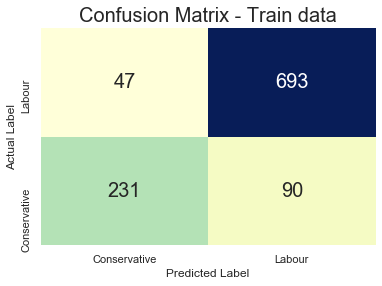

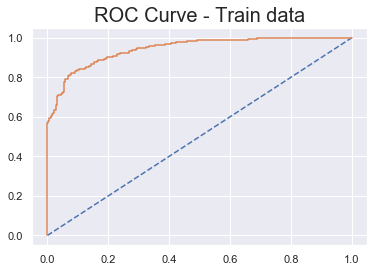

In [123]:
performance_metrics_train(best_grid_RF,x_train, y_train)

Test data accuracy score  : 0.81


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.73      0.61      0.66       139
           1       0.84      0.90      0.87       317

    accuracy                           0.81       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.81      0.81      0.81       456

ROC AUC Score: 87.3 %


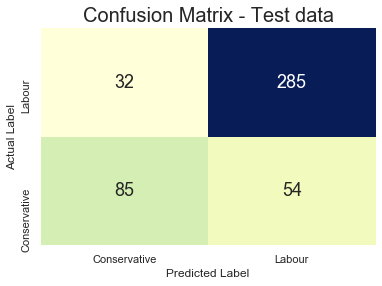

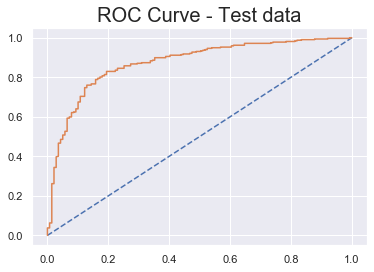

In [124]:
performance_metrics_test(best_grid_RF,x_test,y_test)

### AdaBoost

Training data accuracy score 0.85

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.78      0.69      0.73       321
           1       0.87      0.91      0.89       740

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061

ROC AUC Score: 91.8 %


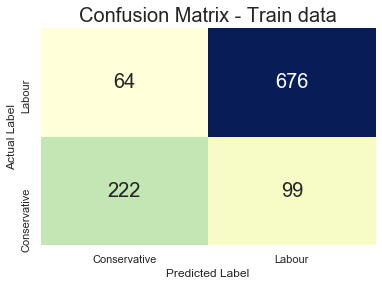

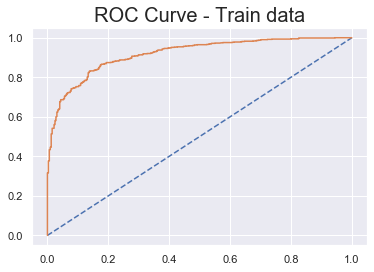

In [125]:
clfADB = AdaBoostClassifier(n_estimators=100)
clfADB.fit(x_train,y_train)

performance_metrics_train(clfADB,x_train,y_train)


Test data accuracy score  : 0.82


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.72      0.71      0.71       139
           1       0.87      0.88      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456

ROC AUC Score: 87.3 %


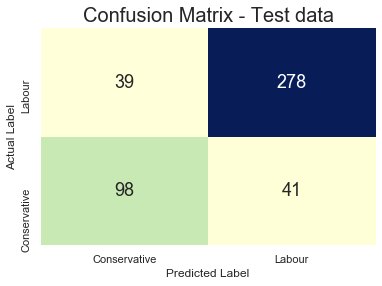

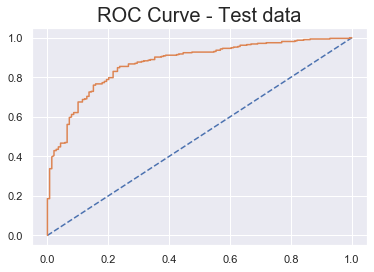

In [126]:
performance_metrics_test(clfADB,x_test,y_test)


In [127]:
clfADB.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': None}

In [128]:
pd.DataFrame(clfADB.feature_importances_,index=x_train.columns,columns=['percent'])

,percent
Age,0.57
Economic_Condn_National,0.06
Economic_Condn_Household,0.04
Blair,0.07
Hague,0.07
Europe,0.14
Gender,0.00
Polt_Knowldg_0,0.02
Polt_Knowldg_1,0.01
Polt_Knowldg_2,0.01


In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [130]:
#No of Trees
def get_models():
    models = dict()
    models['5'] = AdaBoostClassifier(n_estimators=5)
    models['10'] = AdaBoostClassifier(n_estimators=10)
    models['30'] = AdaBoostClassifier(n_estimators=30)
    models['40'] = AdaBoostClassifier(n_estimators=40)
    models['50'] = AdaBoostClassifier(n_estimators=50)
    models['75'] = AdaBoostClassifier(n_estimators=75)
    models['100'] = AdaBoostClassifier(n_estimators=100)
    return models

In [131]:
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model,x_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>5 0.827 (0.030)
>10 0.832 (0.032)
>30 0.832 (0.029)
>40 0.831 (0.026)
>50 0.829 (0.029)
>75 0.827 (0.030)
>100 0.826 (0.030)


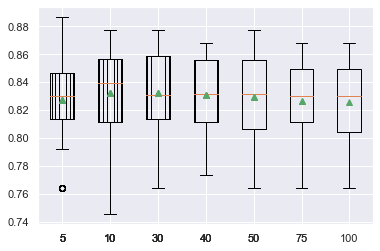

In [132]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
    plt.boxplot(results, labels=names, showmeans=True)

In [133]:
from sklearn.tree import DecisionTreeClassifier
#Weak Learner
def get_models():
    models = dict()
    for i in range(1,5):
        models[str(i)] = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i))
    return models

In [134]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>1 0.829 (0.029)
>2 0.811 (0.027)
>3 0.781 (0.036)
>4 0.794 (0.031)


In [135]:
#Explore Learning Rate
def get_models():
    models = dict()
    for i in np.arange(0.1, 2.1, 0.1):
        key = '%.3f' % i
        models[key] = AdaBoostClassifier(learning_rate=i)
    return models

In [136]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))


>0.100 0.820 (0.034)
>0.200 0.833 (0.030)
>0.300 0.835 (0.031)
>0.400 0.834 (0.027)
>0.500 0.833 (0.028)
>0.600 0.835 (0.028)
>0.700 0.831 (0.028)
>0.800 0.830 (0.027)
>0.900 0.834 (0.027)
>1.000 0.829 (0.029)
>1.100 0.828 (0.032)
>1.200 0.830 (0.028)
>1.300 0.830 (0.029)
>1.400 0.827 (0.023)
>1.500 0.823 (0.027)
>1.600 0.827 (0.029)
>1.700 0.823 (0.030)
>1.800 0.819 (0.030)
>1.900 0.826 (0.040)
>2.000 0.270 (0.048)


In [137]:
grid = { 'n_estimators' : [30,50,100,80],#Around30
               'learning_rate':np.arange(0.1, 2.0, 0.1)
             }

grid_search = GridSearchCV(estimator = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),
                                                          param_grid = grid, cv = 3,verbose=True,n_jobs=-1)
grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 76 candidates, totalling 228 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:   35.5s finished


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'n_estimators': [30, 50, 100, 80]},
             verbose=True)

In [138]:
best_grid_AdaB=grid_search.best_estimator_
grid_search.best_params_

{'learning_rate': 0.9, 'n_estimators': 30}

In [139]:
grid_search.score(x_train, y_train),grid_search.best_score_

(0.8426013195098964, 0.8369504329316112)

Training data accuracy score 0.84

	Classification Report - Training data
               precision    recall  f1-score   support

           0       0.77      0.69      0.72       321
           1       0.87      0.91      0.89       740

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061

ROC AUC Score: 91.3 %


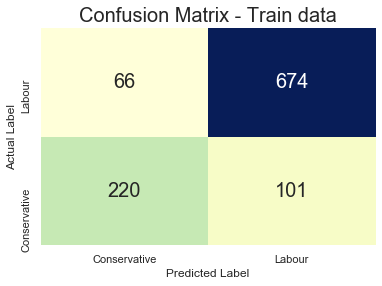

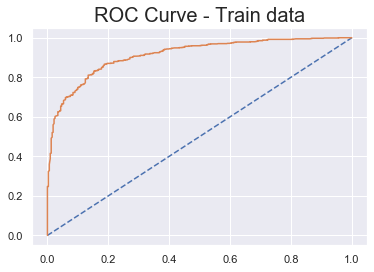

In [140]:
performance_metrics_train(best_grid_AdaB,x_train,y_train)


Test data accuracy score  : 0.82


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.71      0.68      0.70       139
           1       0.86      0.88      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456

ROC AUC Score: 87.7 %


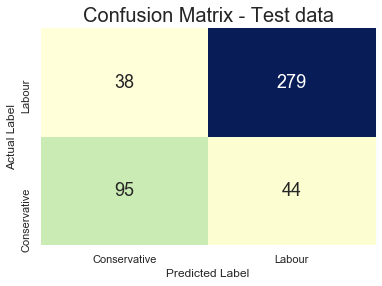

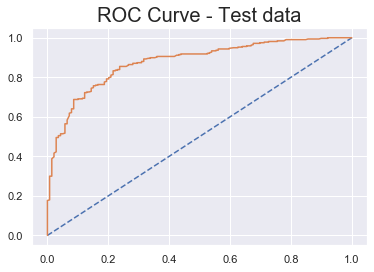

In [141]:
performance_metrics_test(best_grid_AdaB,x_test,y_test)


## Gradient Boosting

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
clfGB=GradientBoostingClassifier(random_state=1,learning_rate=0.05)
clfGB.fit(x_train, y_train)

basemodel_metrics(clfGB,x_train,y_train,'train')

basemodel_metrics(clfGB,x_test,y_test,'test')

		Train Data

Accuracy score 0.87

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.76      0.78       321
           1       0.90      0.92      0.91       740

    accuracy                           0.87      1061
   macro avg       0.85      0.84      0.85      1061
weighted avg       0.87      0.87      0.87      1061

Confusion matrix :
 [[243  78]
 [ 57 683]]
		Test Data

Accuracy score 0.83

Classification Report
               precision    recall  f1-score   support

           0       0.73      0.68      0.71       139
           1       0.87      0.89      0.88       317

    accuracy                           0.83       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.83      0.83       456

Confusion matrix :
 [[ 95  44]
 [ 35 282]]


Training data accuracy score 0.83

		Classification Report - Training data
               precision    recall  f1-score   support

           0       0.73      0.68      0.71       139
           1       0.87      0.89      0.88       317

    accuracy                           0.83       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.83      0.83       456

ROC AUC Score: 88.3 %


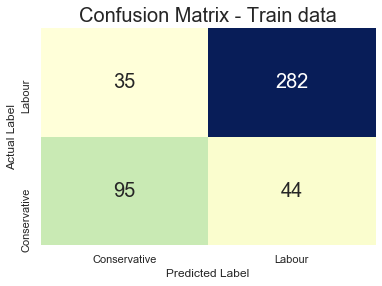

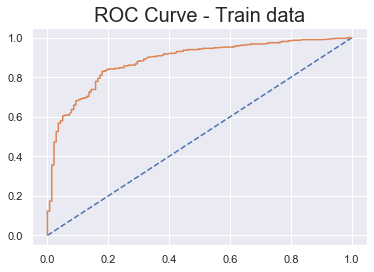

In [144]:
performance_metrics_train(clfGB,x_test,y_test)

Test data accuracy score  : 0.83


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.73      0.68      0.71       139
           1       0.87      0.89      0.88       317

    accuracy                           0.83       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.83      0.83       456

ROC AUC Score: 88.3 %


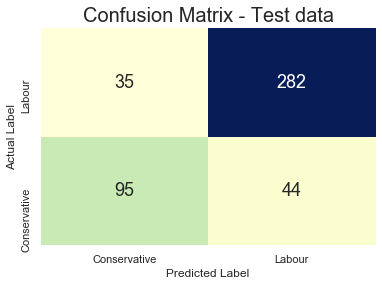

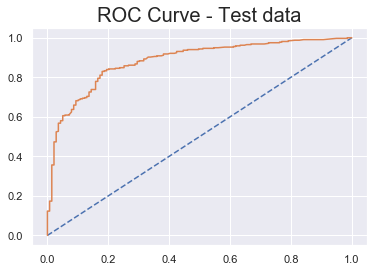

In [145]:
performance_metrics_test(clfGB,x_test,y_test)

In [146]:
clfGB.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [147]:
def get_models():
    models = dict()
    models['40'] = GradientBoostingClassifier(n_estimators=40)
    models['50'] = GradientBoostingClassifier(n_estimators=50)
    models['80'] = GradientBoostingClassifier(n_estimators=80)
    models['150'] = GradientBoostingClassifier(n_estimators=150)
    models['100'] = GradientBoostingClassifier(n_estimators=100)
    models['200'] = GradientBoostingClassifier(n_estimators=200)
    return models


In [148]:
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model,x_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [149]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>40 0.833 (0.028)
>50 0.832 (0.031)
>80 0.832 (0.033)
>150 0.828 (0.029)
>100 0.830 (0.031)
>200 0.826 (0.029)


In [150]:
def get_models():
    models = dict()
    for i in range(1,8):
        models[str(i)] = GradientBoostingClassifier(max_depth=i)
    return models


In [151]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))


>1 0.830 (0.029)
>2 0.842 (0.029)
>3 0.829 (0.031)
>4 0.827 (0.034)
>5 0.823 (0.031)
>6 0.816 (0.032)
>7 0.814 (0.027)


In [152]:
def get_models():
    models = dict()
    for i in np.arange(0.1, 1.1, 0.1):
        key = '%.3f' % i
        models[key] = GradientBoostingClassifier(learning_rate=i)
    return models

In [153]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))


>0.100 0.830 (0.031)
>0.200 0.824 (0.029)
>0.300 0.817 (0.032)
>0.400 0.816 (0.026)
>0.500 0.816 (0.028)
>0.600 0.812 (0.031)
>0.700 0.800 (0.031)
>0.800 0.808 (0.023)
>0.900 0.798 (0.032)
>1.000 0.801 (0.031)


In [154]:
len(x.columns)

11

In [155]:
grid = { 'n_estimators' : [50,100,80],
        'max_depth' : [2],
        'learning_rate': [0.1],
        'min_samples_split':[10,20,30],
        'max_features': [3,4,5]
             }

grid_search = GridSearchCV(estimator = GradientBoostingClassifier(),
                                                          param_grid = grid, cv = 3,verbose=True,n_jobs=-1)
grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of  81 | elapsed:    5.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    5.9s finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [2],
                         'max_features': [3, 4, 5],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [50, 100, 80]},
             verbose=True)

In [156]:
best_grid_GB=grid_search.best_estimator_
grid_search.best_params_


{'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': 5,
 'min_samples_split': 10,
 'n_estimators': 50}

In [157]:
grid_search.score(x_train, y_train),grid_search.best_score_

(0.8567389255419415, 0.8463692962660648)

Training data accuracy score 0.86

		Classification Report - Training data
               precision    recall  f1-score   support

           0       0.80      0.70      0.75       321
           1       0.88      0.92      0.90       740

    accuracy                           0.86      1061
   macro avg       0.84      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061

ROC AUC Score: 92.1 %


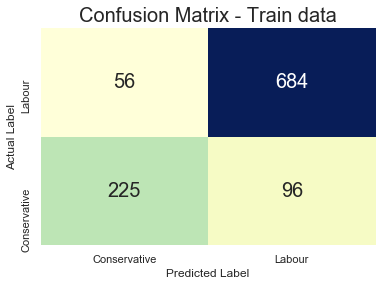

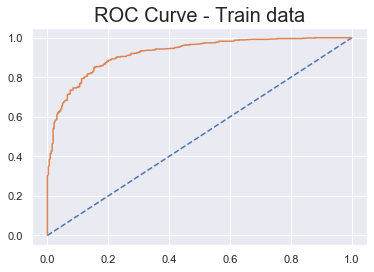

In [158]:
performance_metrics_train(best_grid_GB,x_train,y_train)

Test data accuracy score  : 0.82


Classification Report - Test data
               precision    recall  f1-score   support

           0       0.73      0.63      0.68       139
           1       0.85      0.90      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.76      0.77       456
weighted avg       0.81      0.82      0.81       456

ROC AUC Score: 88.2 %


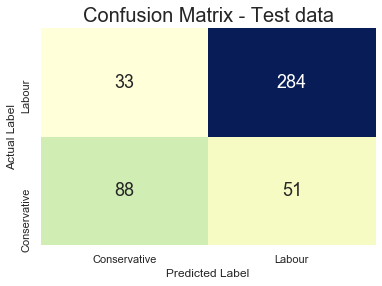

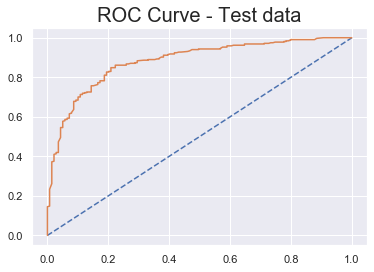

In [159]:
performance_metrics_test(best_grid_GB,x_test,y_test)

In [160]:
pd.DataFrame((clfGB.feature_importances_*100).round(2),index=x_train.columns,columns=['percent']).sort_values('percent',ascending=False)

,percent
Hague,42.28
Blair,19.72
Europe,15.81
Polt_Knowldg_0,8.52
Age,7.42
Economic_Condn_National,4.51
Economic_Condn_Household,0.91
Polt_Knowldg_3,0.46
Polt_Knowldg_2,0.28
Gender,0.08


### XG Boosting

In [161]:
import xgboost as xgb
clfXGB=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
clfXGB.fit(x_train, y_train)

basemodel_metrics(clfXGB,x_train,y_train,'train')

basemodel_metrics(clfXGB,x_test,y_test,'test')

		Train Data

Accuracy score 0.84

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.67      0.72       321
           1       0.86      0.91      0.89       740

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061

Confusion matrix :
 [[215 106]
 [ 64 676]]
		Test Data

Accuracy score 0.8

Classification Report
               precision    recall  f1-score   support

           0       0.71      0.60      0.65       139
           1       0.84      0.89      0.86       317

    accuracy                           0.80       456
   macro avg       0.77      0.75      0.76       456
weighted avg       0.80      0.80      0.80       456

Confusion matrix :
 [[ 84  55]
 [ 35 282]]


## 1.7) Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.	

Here 67% people voted for Labour party and remaining voted for Conservative party. There is a class imbalance.

Since we are predicting the votes, Precision ie. Accuracy is most important metric and 0 and 1 are equally important.

In Gradient boosting,model performance was better before tuning.

Good model : Logistic Regression,LDA,KNN,SVC,Adaboost train and test results are comparable(+_10%).

Accuracy for predicting Conservative party is in 70s 

Accuracy for predicting Conservative party is in 80s

Poor model :Naïve Bayes accuracy score for predicting Conservative party is low but performance is similar in train and test set
Random forest accuracy score for predicting Conservative party is below 10% when compared to train data

Random forest was overfitting data before tuning.


## 1.8) Based on these predictions, what are the insights?

•Labour party has the majority and will win the election

•Hague and Blair are important variables in predicting which party a person votes

•Europe is also an important factor. People who are not Euroseptic are more likely to vote for Labour party

•People with zero political knowledge mostly vote for Labour party.

•Economic_Condn_National has an impact on vote. 
